**Análisis de Grandes Volúmenes de Datos CI-0163<br>
Docente: Allan Berrocal <br>
Estudiante: Carlos Espinoza B92786 <br>
Ciclo: I-2022**


## **Tarea 02** 

<hr />

### **1.1. Descripción**

Este dataset es sobre las transacciones realizadas con la criptomoneda Ethereum. Cuenta con `9841` entradas y `51` features.

**Descripción de las columnas**
 
- **Index**: the index number of a row
- **Address**: the address of the ethereum account
- **FLAG**: whether the transaction is fraud or not
- **Avg min between sent tnx**: Average time between sent transactions for account in minutes
- **Avgminbetweenreceivedtnx**: Average time between received transactions for account in minutes
- **TimeDiffbetweenfirstand_last(Mins)**: Time difference between the first and last transaction
- **Sent_tnx**: Total number of sent normal transactions
- **Received_tnx**: Total number of received normal transactions
- **NumberofCreated_Contracts**: Total Number of created contract transactions
- **UniqueReceivedFrom_Addresses**: Total Unique addresses from which account received transactions
- **UniqueSentTo_Addresses20**: Total Unique addresses from which account sent transactions
- **MinValueReceived**: Minimum value in Ether ever received
- **MaxValueReceived**: Maximum value in Ether ever received
- **AvgValueReceived5Average**: value in Ether ever received
- **MinValSent**: Minimum value of Ether ever sent
- **MaxValSent**: Maximum value of Ether ever sent
- **AvgValSent**: Average value of Ether ever sent
- **MinValueSentToContract**: Minimum value of Ether sent to a contract
- **MaxValueSentToContract**: Maximum value of Ether sent to a contract
- **AvgValueSentToContract**: Average value of Ether sent to contracts
- **TotalTransactions(IncludingTnxtoCreate_Contract)**: Total number of transactions
- **TotalEtherSent**:Total Ether sent for account address
- **TotalEtherReceived**: Total Ether received for account address
- **TotalEtherSent_Contracts**: Total Ether sent to Contract addresses
- **TotalEtherBalance**: Total Ether Balance following enacted transactions
- **TotalERC20Tnxs**: Total number of ERC20 token transfer transactions
- **ERC20TotalEther_Received**: Total ERC20 token received transactions in Ether
- **ERC20TotalEther_Sent**: Total ERC20token sent transactions in Ether
- **ERC20TotalEtherSentContract**: Total ERC20 token transfer to other contracts in Ether
- **ERC20UniqSent_Addr**: Number of ERC20 token transactions sent to Unique account addresses
- **ERC20UniqRec_Addr**: Number of ERC20 token transactions received from Unique addresses
- **ERC20UniqRecContractAddr**: Number of ERC20token transactions received from Unique contract addresses
- **ERC20AvgTimeBetweenSent_Tnx**: Average time between ERC20 token sent transactions in minutes
- **ERC20AvgTimeBetweenRec_Tnx**: Average time between ERC20 token received transactions in minutes
- **ERC20AvgTimeBetweenContract_Tnx**: Average time ERC20 token between sent token transactions
- **ERC20MinVal_Rec**: Minimum value in Ether received from ERC20 token transactions for account
- **ERC20MaxVal_Rec**: Maximum value in Ether received from ERC20 token transactions for account
- **ERC20AvgVal_Rec**: Average value in Ether received from ERC20 token transactions for account
- **ERC20MinVal_Sent**: Minimum value in Ether sent from ERC20 token transactions for account
- **ERC20MaxVal_Sent**: Maximum value in Ether sent from ERC20 token transactions for account
- **ERC20AvgVal_Sent**: Average value in Ether sent from ERC20 token transactions for account
- **ERC20UniqSentTokenName**: Number of Unique ERC20 tokens transferred
- **ERC20UniqRecTokenName**: Number of Unique ERC20 tokens received
- **ERC20MostSentTokenType**: Most sent token for account via ERC20 transaction
- **ERC20MostRecTokenType**: Most received token for account via ERC20 transactions

### **1.2. Justificación**

Este es un caso de estudio ampliamente analizado dada su importancia en la vida cotidiana de las personas. Este conjunto permite hacer un análisis de una buena cantidad de atributos, y es lo suficientemente extenso para obtener resultados interesantes a la hora de hacer el modelado. Único aspecto negativo de este dataset es que no está balanceado, es decir, no hay una buena proporción de datos entre los casos fraudulentos con los no fraudulentos. Más adelante se mostrará cual es la proporción real del conjunto.

### **2. Técnicas de Exploración**

Listado de técnicas de exploración para este dataset:

- Proporción entre la variable `target`
- Cantidad de Valores Únicos
- Correlación

In [58]:
import pandas as pandas
import numpy as np
import matplotlib.pyplot as plot

dataFrame = pandas.read_csv("transaction_dataset.csv")

In [59]:
dataFrame.shape

(9841, 51)

In [60]:
# Vamos a tomar una muestra del dataset, para ver cual es su contenido
dataFrame.sample(10)

,Unnamed: 0,Index,Address,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,min value received,max value received,avg val received,min val sent,max val sent,avg val sent,min value sent to contract,max val sent to contract,avg value sent to contract,total transactions (including tnx to create contract,total Ether sent,total ether received,total ether sent contracts,total ether balance,Total ERC20 tnxs,ERC20 total Ether received,ERC20 total ether sent,ERC20 total Ether sent contract,ERC20 uniq sent addr,ERC20 uniq rec addr,ERC20 uniq sent addr.1,ERC20 uniq rec contract addr,ERC20 avg time between sent tnx,ERC20 avg time between rec tnx,ERC20 avg time between rec 2 tnx,ERC20 avg time between contract tnx,ERC20 min val rec,ERC20 max val rec,ERC20 avg val rec,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name,ERC20 most sent token type,ERC20_most_rec_token_type
2592,2592,2593,0x43ccf1b0748f2f90735d3399de1abf562cbabbca,0,0.00,0.00,0.00,0,1,0,1,0,0.005000,0.005000,0.005000,0.000000,0.000000,0.000000,0.0,0.0,0.0,1,0.000000,0.005000,0.0,0.005000,0.0,0.000000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.000000,0.0,0.00,0.000000,0.0,0.0,0.0,0.0,0.0,0,0
9831,9831,2170,0xfe9b7db8d9d57e9ad9341bcf51b110ba5d27b48b,1,193.09,81.82,1485.80,6,4,0,3,6,0.000100,8.293050,2.598288,0.312210,7.013525,1.731872,0.0,0.0,0.0,10,10.391234,10.393150,0.0,0.001916,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7822,7822,161,0x1086feeb031e45e8fcd770662aa8302d7c23ba1f,1,533.39,602.95,171032.73,263,51,0,43,60,0.006697,100.140366,4.283776,0.000000,50.000000,1.264030,0.0,0.0,0.0,314,332.440000,218.472598,0.0,-113.967402,115.0,164367.161200,163875.9677,0.0,6.0,43.0,0.0,50.0,0.0,0.0,0.0,0.0,0.000000,37210.28000,2282.877240,0.0,37210.28,3811.069017,0.0,0.0,0.0,27.0,49.0,MCAP,MCAP
1590,1590,1591,0x290aceeae164655abf110f6e0b256f8be3df8c64,0,1899.64,113809.07,938967.22,15,8,0,7,10,0.008000,23.860962,3.649513,0.000679,23.741605,1.945934,0.0,0.0,0.0,23,29.189006,29.196104,0.0,0.007098,0.0,0.000000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.000000,0.0,0.00,0.000000,0.0,0.0,0.0,0.0,0.0,0,0
4400,4400,1468,0x74fae8c6d59b379ce6ab1c5174460f9b097782c2,0,59473.22,7956.62,539438.70,8,8,0,1,3,0.245000,313.759943,44.008118,1.000000,100.000000,42.500000,0.0,0.0,0.0,16,340.000000,352.064943,0.0,12.064943,17.0,3486.769027,0.0000,0.0,0.0,12.0,0.0,16.0,0.0,0.0,0.0,0.0,0.000000,1241.14010,205.104060,0.0,0.00,0.000000,0.0,0.0,0.0,0.0,16.0,None,SAFE.AD - 20% DISCOUNT UNTIL 1 MAY
6658,6658,3726,0xb1b7bf21c63744c47100bb4ff513eff6379a559f,0,23414.41,15955.35,736417.52,26,8,0,5,10,0.758034,33.990000,14.932481,0.827243,37.000000,7.876300,0.0,0.0,0.0,34,204.783796,119.459851,0.0,-85.323945,12.0,1322.499249,0.0000,0.0,0.0,9.0,0.0,12.0,0.0,0.0,0.0,0.0,0.000000,721.66481,110.208271,0.0,0.00,0.000000,0.0,0.0,0.0,0.0,12.0,None,Livepeer Token
411,411,412,0x09176e072b97ee4194312e9b6ac2c05a19b972b9,0,22387.89,5.08,89561.72,4,2,0,1,2,0.100000,60.000000,30.050000,0.050000,40.000000,15.024500,0.0,0.0,0.0,6,60.098000,60.100000,0.0,0.002000,2.0,601.510225,0.0000,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,1.510225,600.00000,300.755112,0.0,0.00,0.000000,0.0,0.0,0.0,0.0,2.0,None,OmiseGO
4482,4482,1550,0x772ed0990721a1dfa22e9e6a8331db39a14c505f,0,19.36,170.06,642625.87,3177,3417,0,1,1,0.185816,2.232373,0.982904,0.498161,13.523592,1.056204,0.0,0.0,0.0,6594,3355.559314,3358.582524,0.0,3.023210,5.0,18740.118810,0.0000,0.0,0.0,5.0,0.0,5.0,0.0,0.0,0.0,0.0,0.000000,18735.00000,3748.023762,0.0,0.00,0.000000,0.0,0.0,0.0,0.0,5.0,None,Loopring
6359,6359,3427,0xa9b7627a2fff6399043edd178cf3172117d66005,0,25.95,6107.01,1440701.80,214,235,0,23,3,0.000914,

In [61]:
# Vamos a conocer cuales son los tipos de datos que tiene este dataset
dataFrame.dtypes

Unnamed: 0                                                int64
Index                                                     int64
Address                                                  object
FLAG                                                      int64
Avg min between sent tnx                                float64
Avg min between received tnx                            float64
Time Diff between first and last (Mins)                 float64
Sent tnx                                                  int64
Received Tnx                                              int64
Number of Created Contracts                               int64
Unique Received From Addresses                            int64
Unique Sent To Addresses                                  int64
min value received                                      float64
max value received                                      float64
avg val received                                        float64
min val sent                            

> Probablemente en el aparartado de transformaciones haga falta eliminar una o varias de las columnas que no aportan mucho al análisis

In [62]:
# @param percentage: porcentage de aceptación para clasificarla como variable para revisión
def getFeaturesWithLowUniqueValues(percentage, showPrint = True):

	#Marcamos algunas columnas para análsis
	lowUniqueValueFeatures = list()

	for col in dataFrame:

		uniqueValues = len(dataFrame[col].unique())
		colLength = len(dataFrame[col])
		varietyPercentage = round(uniqueValues * 100 / colLength, 2)

		if(varietyPercentage < percentage):
			lowUniqueValueFeatures.append(col)
		
		if(showPrint):
			print(col, ":", uniqueValues, "[", varietyPercentage, "%]")

	return lowUniqueValueFeatures

lowUniqueValueFeatures = getFeaturesWithLowUniqueValues(20)


Unnamed: 0 : 9841 [ 100.0 %]
Index : 4729 [ 48.05 %]
Address : 9816 [ 99.75 %]
FLAG : 2 [ 0.02 %]
Avg min between sent tnx : 5013 [ 50.94 %]
Avg min between received tnx : 6223 [ 63.24 %]
Time Diff between first and last (Mins) : 7810 [ 79.36 %]
Sent tnx : 641 [ 6.51 %]
Received Tnx : 727 [ 7.39 %]
Number of Created Contracts : 20 [ 0.2 %]
Unique Received From Addresses : 256 [ 2.6 %]
Unique Sent To Addresses : 258 [ 2.62 %]
min value received : 4589 [ 46.63 %]
max value received  : 6302 [ 64.04 %]
avg val received : 6767 [ 68.76 %]
min val sent : 4719 [ 47.95 %]
max val sent : 6647 [ 67.54 %]
avg val sent : 5854 [ 59.49 %]
min value sent to contract : 3 [ 0.03 %]
max val sent to contract : 4 [ 0.04 %]
avg value sent to contract : 4 [ 0.04 %]
total transactions (including tnx to create contract : 897 [ 9.11 %]
total Ether sent : 5868 [ 59.63 %]
total ether received : 6728 [ 68.37 %]
total ether sent contracts : 4 [ 0.04 %]
total ether balance : 5717 [ 58.09 %]
 Total ERC20 tnxs : 301 [

> Por medio de la función anterior es posible ver cual es la cantidad de valores únicos para cada uno de los atributos. Además se puede definir un porcentage base para poder clasificar los atributos que probablemente van a requerir un análisis más a profundidad para saber si van a tener un impacto en la generación del modelo.

In [63]:
lowUniqueValueFeatures

['FLAG',
 'Sent tnx',
 'Received Tnx',
 'Number of Created Contracts',
 'Unique Received From Addresses',
 'Unique Sent To Addresses',
 'min value sent to contract',
 'max val sent to contract',
 'avg value sent to contract',
 'total transactions (including tnx to create contract',
 'total ether sent contracts',
 ' Total ERC20 tnxs',
 ' ERC20 total ether sent',
 ' ERC20 total Ether sent contract',
 ' ERC20 uniq sent addr',
 ' ERC20 uniq rec addr',
 ' ERC20 uniq sent addr.1',
 ' ERC20 uniq rec contract addr',
 ' ERC20 avg time between sent tnx',
 ' ERC20 avg time between rec tnx',
 ' ERC20 avg time between rec 2 tnx',
 ' ERC20 avg time between contract tnx',
 ' ERC20 min val rec',
 ' ERC20 min val sent',
 ' ERC20 max val sent',
 ' ERC20 avg val sent',
 ' ERC20 min val sent contract',
 ' ERC20 max val sent contract',
 ' ERC20 avg val sent contract',
 ' ERC20 uniq sent token name',
 ' ERC20 uniq rec token name',
 ' ERC20 most sent token type',
 ' ERC20_most_rec_token_type']

> Este último arreglo nos indica cuales son los atributos que tienen un porcentage mejor a `20` en su cantidad de valores únicos en comparación a la cantidad total de valores encontrados para ese `feature`

**Revisamos la distribución**

<AxesSubplot:>

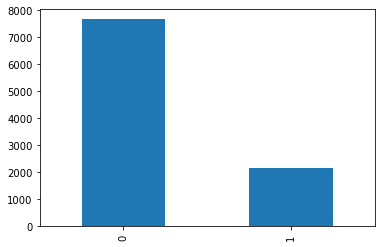

In [64]:
dataFrame['FLAG'].value_counts().plot(kind='bar')

In [65]:
fraudTransac = dataFrame[dataFrame["FLAG"] == 1]
notFraudTransac = dataFrame[dataFrame["FLAG"] == 0]

print("Relacion:", len(notFraudTransac) * 100 / len(dataFrame), "-", len(fraudTransac) * 100 / len(dataFrame))
print(len(notFraudTransac) * 100 / len(dataFrame) - len(fraudTransac) * 100 / len(dataFrame))

Relacion: 77.85794126613149 - 22.14205873386851
55.71588253226298


Como se puede apreciar, hay una diferncia del `55.72%` entre la cantidad de elementos señalados como fraude, esto tendrá un gran impacto a la hora de entrenar los modelos

**Correlaciones**

In [66]:
dataFrame.corr()

,Unnamed: 0,Index,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,min value received,max value received,avg val received,min val sent,max val sent,avg val sent,min value sent to contract,max val sent to contract,avg value sent to contract,total transactions (including tnx to create contract,total Ether sent,total ether received,total ether sent contracts,total ether balance,Total ERC20 tnxs,ERC20 total Ether received,ERC20 total ether sent,ERC20 total Ether sent contract,ERC20 uniq sent addr,ERC20 uniq rec addr,ERC20 uniq sent addr.1,ERC20 uniq rec contract addr,ERC20 avg time between sent tnx,ERC20 avg time between rec tnx,ERC20 avg time between rec 2 tnx,ERC20 avg time between contract tnx,ERC20 min val rec,ERC20 max val rec,ERC20 avg val rec,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name
Unnamed: 0,1.000000,0.299357,0.719153,-0.022847,-0.089393,-0.185789,-0.057103,-0.050315,-0.005023,-0.016921,-0.033909,-0.021266,-0.013765,-0.017349,-0.003957,-0.032754,-0.054573,-0.012114,0.000634,-0.003715,-0.067501,-0.027697,-0.016845,0.000634,0.015632,-0.008203,0.000601,2.040507e-02,0.012124,-0.012013,-0.011191,-0.000714,-0.011809,NaN,NaN,NaN,NaN,0.008496,7.638862e-04,0.008451,0.020647,0.020268,0.020190,NaN,NaN,NaN,0.009638,-0.011288
Index,0.299357,1.000000,-0.316268,0.006141,0.041309,0.093342,0.030468,0.037318,0.021667,0.013848,0.017448,0.003851,0.008079,-0.000627,-0.011636,-0.003632,0.011624,-0.004603,0.013046,0.008798,0.045287,-0.012957,-0.000935,0.013046,0.017747,0.014263,-0.000663,2.364851e-03,0.003271,0.008077,0.000758,0.006221,-0.000667,NaN,NaN,NaN,NaN,-0.001782,-6.795122e-04,-0.001780,0.002152,0.001966,0.001918,NaN,NaN,NaN,-0.007285,-0.000746
FLAG,0.719153,-0.316268,1.000000,-0.029754,-0.118533,-0.269354,-0.078006,-0.079316,-0.013711,-0.031941,-0.045584,-0.021641,-0.019259,-0.011881,0.006626,-0.022437,-0.063556,-0.007213,-0.007988,-0.008883,-0.100289,-0.014993,-0.016900,-0.007988,-0.003229,-0.025697,-0.004475,2.476225e-02,0.013514,-0.020554,-0.017539,-0.003047,-0.018527,NaN,NaN,NaN,NaN,0.011163,-4.313011e-03,0.007881,0.025364,0.025038,0.025044,NaN,NaN,NaN,0.009249,-0.018047
Avg min between sent tnx,-0.022847,0.006141,-0.029754,1.000000,0.060979,0.214722,-0.032289,-0.035735,-0.006186,-0.015912,-0.017688,-0.014886,-0.007104,-0.004382,-0.000789,-0.005716,0.003597,-0.000210,0.001044,0.000759,-0.043586,-0.006440,-0.007285,0.001044,-0.001425,-0.012307,-0.002542,-2.104957e-03,-0.004409,-0.009477,-0.001133,-0.012754,0.045615,NaN,NaN,NaN,NaN,0.004673,-2.455932e-03,-0.003149,-0.001687,-0.002020,-0.001965,NaN,NaN,NaN,0.000529,0.047202
Avg min between received tnx,-0.089393,0.041309,-0.118533,0.060979,1.000000,0.303897,-0.040419,-0.053478,-0.008378,-0.029571,-0.025747,-0.045753,-0.011575,-0.009313,-0.008761,-0.012176,-0.040011,-0.003916,-0.003230,-0.003940,-0.060711,-0.009442,-0.010720,-0.003230,-0.002149,-0.020578,-0.003656,-3.876053e-03,-0.006160,-0.014776,-0.016037,-0.014698,-0.014932,NaN,NaN,NaN,NaN,-0.008319,-3.544424e-03,-0.005606,-0.003758,-0.003780,-0.003727,NaN,NaN,NaN,-0.019896,-0.014966
Time Diff between first and last (Mins),-0.185789,0.093342,-0.269354,0.214722,0.303897,1.000000,0.154480,0.148376,-0.003881,0.037043,0.071140,-0.084996,-0.002240,-0.014002,-0.013107,0.014194,-0.046039,0.001734,0.036162,0.029440,0.189311,0.012999,0.014756,0.036162,0.002955,0.075922,0.046788,-5.013726e-03,-0.008389,0.040686,0.080709,0.019961,0.319176,NaN,NaN,NaN,NaN,-0.010543,4.651212e-02,0.049020,-0.006852,-0.006268,-0.006802,NaN,NaN,NaN,0.263939,0.324288
Sent tnx,-0.057103,0.030468,-0.078006,-0.032289,-0.040419,0.154480,1.000000,0.198455,0.320603,0.130064,0.670014,0.024015,0.102109,0.140677,-0.004846,0.225356,0.027468,0.029529,0.013263,0.020865,0.731

<AxesSubplot:>

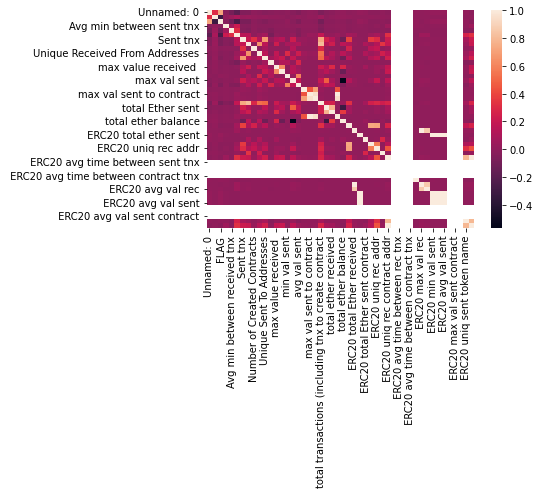

In [67]:
import seaborn as sn

sn.heatmap(dataFrame.corr())

**Valores Faltantes**

In [68]:
lowUniqueValueFeatures = getFeaturesWithLowUniqueValues(30, False)
for feature in lowUniqueValueFeatures:
	missingValues = dataFrame[feature].isnull().sum()
	print("Para el feature:", feature, "--Missing","[", missingValues, "]")

Para el feature: FLAG --Missing [ 0 ]
Para el feature: Sent tnx --Missing [ 0 ]
Para el feature: Received Tnx --Missing [ 0 ]
Para el feature: Number of Created Contracts --Missing [ 0 ]
Para el feature: Unique Received From Addresses --Missing [ 0 ]
Para el feature: Unique Sent To Addresses --Missing [ 0 ]
Para el feature: min value sent to contract --Missing [ 0 ]
Para el feature: max val sent to contract --Missing [ 0 ]
Para el feature: avg value sent to contract --Missing [ 0 ]
Para el feature: total transactions (including tnx to create contract --Missing [ 0 ]
Para el feature: total ether sent contracts --Missing [ 0 ]
Para el feature:  Total ERC20 tnxs --Missing [ 829 ]
Para el feature:  ERC20 total ether sent --Missing [ 829 ]
Para el feature:  ERC20 total Ether sent contract --Missing [ 829 ]
Para el feature:  ERC20 uniq sent addr --Missing [ 829 ]
Para el feature:  ERC20 uniq rec addr --Missing [ 829 ]
Para el feature:  ERC20 uniq sent addr.1 --Missing [ 829 ]
Para el feature

### **3. Técnicas de Preprocesamiento**

**Técnicas de preprocesamiento:**
- Llenado de los valores nulos

In [69]:
cleanedDataFrame = pandas.read_csv("transaction_dataset.csv")

In [70]:
cleanedDataFrame = pandas.read_csv("transaction_dataset.csv")

#Vamos a obtener cuales son los atributos que tienen valores faltantes
def getFeaturesWithMissingValues(dataFrame):
	#Se guardan los atributos con valores faltantes
	featuresWithMissingValues = list()

	for feature in dataFrame:
		if(dataFrame[feature].isnull().sum() > 0):
			featuresWithMissingValues.append(feature)

	return featuresWithMissingValues

#Se llenan los campos con valores faltantes
def fillMissingValues(dataFrame, featuresWithMissingValues):
	for feature in featuresWithMissingValues:
		dataFrame[feature] = dataFrame[feature].fillna(0)

featuresWithMissingValues = getFeaturesWithMissingValues(cleanedDataFrame)
print("Cantidad de atributos con valores faltantes:", len(featuresWithMissingValues))

fillMissingValues(cleanedDataFrame, featuresWithMissingValues)

featuresWithMissingValues = getFeaturesWithMissingValues(cleanedDataFrame)
print("Cantidad de atributos con valores faltantes:", len(featuresWithMissingValues))

Cantidad de atributos con valores faltantes: 25
Cantidad de atributos con valores faltantes: 0


In [71]:
for feature in cleanedDataFrame:
	print(feature, ":", cleanedDataFrame[feature].isnull().sum())


Unnamed: 0 : 0
Index : 0
Address : 0
FLAG : 0
Avg min between sent tnx : 0
Avg min between received tnx : 0
Time Diff between first and last (Mins) : 0
Sent tnx : 0
Received Tnx : 0
Number of Created Contracts : 0
Unique Received From Addresses : 0
Unique Sent To Addresses : 0
min value received : 0
max value received  : 0
avg val received : 0
min val sent : 0
max val sent : 0
avg val sent : 0
min value sent to contract : 0
max val sent to contract : 0
avg value sent to contract : 0
total transactions (including tnx to create contract : 0
total Ether sent : 0
total ether received : 0
total ether sent contracts : 0
total ether balance : 0
 Total ERC20 tnxs : 0
 ERC20 total Ether received : 0
 ERC20 total ether sent : 0
 ERC20 total Ether sent contract : 0
 ERC20 uniq sent addr : 0
 ERC20 uniq rec addr : 0
 ERC20 uniq sent addr.1 : 0
 ERC20 uniq rec contract addr : 0
 ERC20 avg time between sent tnx : 0
 ERC20 avg time between rec tnx : 0
 ERC20 avg time between rec 2 tnx : 0
 ERC20 avg 

**Justificación**

Como se pudo observar eran casi la mitad de los atributos que contaban con valores faltantes. Para hacer la limpieza, se decidió elegir el valor `0` para reemplazar los campos vacíos, esto tomando en cuenta que los valores mínimos eran siempre 0.

### **4. Técnicas de Transformación**

**Transformaciones por realizar:**
- Eliminación de columnas sin relevancia para el modelo

In [72]:
rawDataFrame = cleanedDataFrame.copy()

lowUniqueValueFeatures = getFeaturesWithLowUniqueValues(5, False)
rawDataFrame.describe()
for feature in lowUniqueValueFeatures:
	if(feature != "FLAG"):
		rawDataFrame.drop(feature, axis=1, inplace=True)

rawDataFrame.drop(['Unnamed: 0', 'Index', 'Address'], axis=1, inplace=True)

In [73]:
rawDataFrame.describe()

,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,min value received,max value received,avg val received,min val sent,max val sent,avg val sent,total transactions (including tnx to create contract,total Ether sent,total ether received,total ether balance,ERC20 total Ether received,ERC20 total ether sent,ERC20 min val rec,ERC20 max val rec,ERC20 avg val rec,ERC20 max val sent,ERC20 avg val sent
count,9841.000000,9841.000000,9841.000000,9.841000e+03,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9.841000e+03,9.841000e+03,9.841000e+03,9.841000e+03,9.841000e+03,9841.000000,9.841000e+03,9.841000e+03,9.841000e+03,9.841000e+03
mean,0.221421,5086.878721,8004.851184,2.183333e+05,115.931714,163.700945,43.845153,523.152481,100.711721,4.800090,314.617297,44.755731,283.362362,1.016092e+04,1.163832e+04,1.477395e+03,1.187015e+08,1.270022e+07,444.706794,1.147012e+08,3.980082e+06,1.193780e+07,5.786132e+06
std,0.415224,21486.549974,23081.714801,3.229379e+05,757.226361,940.836550,325.929139,13008.821539,2885.002236,138.609682,6629.212643,239.080215,1352.404013,3.583227e+05,3.642048e+05,2.424254e+05,1.008496e+10,1.129580e+09,16157.005403,1.008383e+10,2.049048e+08,1.129115e+09,5.660157e+08
min,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,-1.560535e+07,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000,0.000000,0.000000,3.169300e+02,1.000000,1.000000,0.001000,1.000000,0.426905,0.000000,0.164577,0.086184,4.000000,2.262059e-01,2.670424e+00,6.214900e-04,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.000000,17.340000,509.770000,4.663703e+04,3.000000,4.000000,0.095856,6.000000,1.729730,0.049126,4.999380,1.606000,8.000000,1.248680e+01,3.052963e+01,1.722000e-03,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.000000,565.470000,5480.390000,3.040710e+05,11.000000,27.000000,2.000000,67.067040,22.000000,0.998800,61.520653,21.999380,54.000000,1.009990e+02,1.010000e+02,4.452000e-02,2.214800e+01,0.000000e+00,0.000000,1.900559e+01,1.337000e+01,0.000000e+00,0.000000e+00
max,1.000000,430287.670000,482175.490000,1.954861e+06,10000.000000,10000.000000,10000.000000,800000.000000,283618.831600,12000.000000,520000.000000,12000.000000,19995.000000,2.858096e+07,2.858159e+07,1.428864e+07,1.000020e+12,1.120000e+11,990000.000000,1.000000e+12,1.724181e+10,1.120000e+11,5.614756e+10


**Justificación**

En los análisis previos se había encontrado que los valores de los atributos eliminados('Unnamed: 0', 'Index', 'Address', ' ERC20_most_rec_token_type', ' ERC20 most sent token type') no eran de relevencia para el modelo. Algunos eran identificadores, mientras que otros tenían todavía valores incompletos siendo de tipo categóricos, por lo que era difícil cambiarlos por un simple valor árbitrario

In [74]:
#Exportacion del dataset modificado
rawDataFrame.to_csv("cleaned_transaction_dataset.csv", index = False)

### **5. Algoritmos de Machine Learning**

In [75]:
import sklearn
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split
from matplotlib import pyplot
from imblearn.ensemble import BalancedRandomForestClassifier


dataFrame = pandas.read_csv("cleaned_transaction_dataset.csv")
dataFrame.describe()

,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,min value received,max value received,avg val received,min val sent,max val sent,avg val sent,total transactions (including tnx to create contract,total Ether sent,total ether received,total ether balance,ERC20 total Ether received,ERC20 total ether sent,ERC20 min val rec,ERC20 max val rec,ERC20 avg val rec,ERC20 max val sent,ERC20 avg val sent
count,9841.000000,9841.000000,9841.000000,9.841000e+03,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9.841000e+03,9.841000e+03,9.841000e+03,9.841000e+03,9.841000e+03,9841.000000,9.841000e+03,9.841000e+03,9.841000e+03,9.841000e+03
mean,0.221421,5086.878721,8004.851184,2.183333e+05,115.931714,163.700945,43.845153,523.152481,100.711721,4.800090,314.617297,44.755731,283.362362,1.016092e+04,1.163832e+04,1.477395e+03,1.187015e+08,1.270022e+07,444.706794,1.147012e+08,3.980082e+06,1.193780e+07,5.786132e+06
std,0.415224,21486.549974,23081.714801,3.229379e+05,757.226361,940.836550,325.929139,13008.821539,2885.002236,138.609682,6629.212643,239.080215,1352.404013,3.583227e+05,3.642048e+05,2.424254e+05,1.008496e+10,1.129580e+09,16157.005403,1.008383e+10,2.049048e+08,1.129115e+09,5.660157e+08
min,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,-1.560535e+07,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000,0.000000,0.000000,3.169300e+02,1.000000,1.000000,0.001000,1.000000,0.426905,0.000000,0.164577,0.086184,4.000000,2.262059e-01,2.670424e+00,6.214900e-04,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.000000,17.340000,509.770000,4.663703e+04,3.000000,4.000000,0.095856,6.000000,1.729730,0.049126,4.999380,1.606000,8.000000,1.248680e+01,3.052963e+01,1.722000e-03,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.000000,565.470000,5480.390000,3.040710e+05,11.000000,27.000000,2.000000,67.067040,22.000000,0.998800,61.520653,21.999380,54.000000,1.009990e+02,1.010000e+02,4.452000e-02,2.214800e+01,0.000000e+00,0.000000,1.900559e+01,1.337000e+01,0.000000e+00,0.000000e+00
max,1.000000,430287.670000,482175.490000,1.954861e+06,10000.000000,10000.000000,10000.000000,800000.000000,283618.831600,12000.000000,520000.000000,12000.000000,19995.000000,2.858096e+07,2.858159e+07,1.428864e+07,1.000020e+12,1.120000e+11,990000.000000,1.000000e+12,1.724181e+10,1.120000e+11,5.614756e+10


In [76]:
#Hacemos las conversiones para obtener los features y los labels o target variables

#Target variable: FLAG
target = np.array(dataFrame["FLAG"])

features = dataFrame.copy()
features.drop("FLAG", axis=1, inplace=True)

#Feature list
feature_list = list(features.columns)

#Features df
features = np.array(features)

#Number of features
featureNumber = len(feature_list)

In [77]:
#Modelos
randomForestModel = RandomForestClassifier(n_estimators=500, max_features=7, class_weight="balanced")
extraTreesClassifier = ExtraTreesClassifier(n_estimators=500, max_features=7, class_weight="balanced_subsample")
balanced = BalancedRandomForestClassifier()
train_features, test_features, train_labels, test_labels = train_test_split(features, target, test_size = 0.25, random_state = 42)

print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)


Training Features Shape: (7380, 22)
Training Labels Shape: (7380,)
Testing Features Shape: (2461, 22)
Testing Labels Shape: (2461,)


In [78]:
randomForestModel.fit(train_features, train_labels)
extraTreesClassifier.fit(train_features, train_labels)
balanced.fit(train_features, train_labels)

BalancedRandomForestClassifier()

In [79]:
# Get a random sample from the cleaned and transformed dataset
# @sampleSize: amount of rows
def getSamples(sampleSize):
	randomSample = dataFrame.sample(sampleSize)
	randomSample = np.array(randomSample)
	randomSample.shape

	featuresOnly = randomSample[:, 1:]
	targetsOnly = randomSample[:, 0]

	return featuresOnly, targetsOnly

In [80]:
# Make a test over the selected model with a feature array and its target values
# @model: model to be tested
# @X: feature only list
# @y: target only list
def testAccuracy(model, X, y):

	predictions = list()
	for row in X:
		rowPrediction = list()
		rowPrediction.append(row)
		rowPrediction = np.array(rowPrediction)
		prediction = model.predict(rowPrediction)
		predictions.append(prediction[0])

	errorCounter = 0
	for i in range(0, len(predictions)):
		if(y[i] != predictions[i]):
			errorCounter += 1

	#Accuracy %
	accuracy = 100 - (errorCounter * 100 / len(X))

	return accuracy


**Se pone aprueba la precisión del modelo Random Forest**

**Justificación de los algoritmos**

Cómo se mencionó anteriormente, este conjunto de datos presenta el problema de no encontrarse balanceado, es decir, hay una gran diferencia entre la clase minoritaria y la clase mayoritaria. Para poder atacar este problema de tiene que hacer uso de técnicas como `subsample` u `oversample`, las cuales se encuentran disponibles en las librería `imblearn`

### **6. Justificación y Evaluación de Modelos**

In [81]:
# get a list of models to evaluate
def get_models():
	models = dict()
	# define number of trees to consider
	n_trees = [10, 50, 100, 500, 1000]
	for n in n_trees:
		models[str(n)] = RandomForestClassifier(n_estimators=n, class_weight='balanced_subsample')
	return models

In [82]:
# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
	# define the evaluation procedure
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	# evaluate the model and collect the results
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores

# define dataset
X, y = train_features, train_labels

# evaluate the models and store results
results, models = list(), list()

models = [randomForestModel, extraTreesClassifier, balanced]
names = ["Random Forest", "Extra Trees", "Balanced"]

for model in models:
	# evaluate the model
	scores = evaluate_model(model, X, y)
	# store the results
	results.append(scores)
	# summarize the performance along the way
	print('>Result: %.3f (%.3f)' % (mean(scores), std(scores)))



>Result: 0.955 (0.009)
>Result: 0.944 (0.009)
>Result: 0.941 (0.008)


**Justificación**

Al tratarse de un problema de clasificación se pudo observar un buen rendimiento en los tres modelos, no obstante, es necesario un análisis más a profundidad de los datos obtenidos

### **7. Resultados**

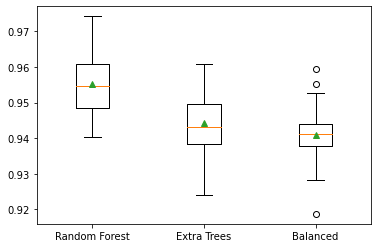

In [83]:
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

In [84]:
X, y = getSamples(300)
accuracyRandomForest = testAccuracy(randomForestModel, X, y)
print(accuracyRandomForest, "%")

accuracyExtraTrees = testAccuracy(extraTreesClassifier, X, y)
print(accuracyExtraTrees, "%")

accuracyBalanced = testAccuracy(balanced, X, y)
print(accuracyBalanced, "%")



99.66666666666667 %
98.33333333333333 %
98.66666666666667 %


In [85]:
def showAccuracyChart(model, X, y):
	predictions = list()

	fig = plot.figure()
	ax = plot.axes()

	for row in X:

		rowPrediction = [row]
		rowPrediction = np.array(rowPrediction)

		prediction = model.predict(rowPrediction)
		predictions.append(prediction[0])
	
	ax.plot(np.arange(len(y)), predictions, label = "Predicción")
	ax.plot(np.arange(len(y)), y, label = "Valor Real")
	plot.title("Predicciones vs Valores Reales")
	plot.xlabel("Filas")

	print("Predicciones:\n", predictions)
	print("Valores Reales:\n", y)



In [86]:
# Cargar diferentes samples
X, y = getSamples(20)

Predicciones:
 [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0]
Valores Reales:
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0.]


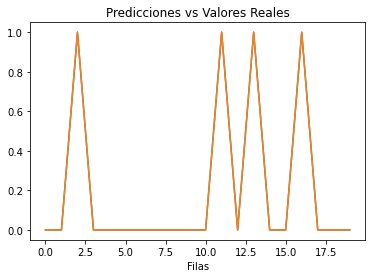

In [87]:
showAccuracyChart(randomForestModel, X, y)

Predicciones:
 [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0]
Valores Reales:
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0.]


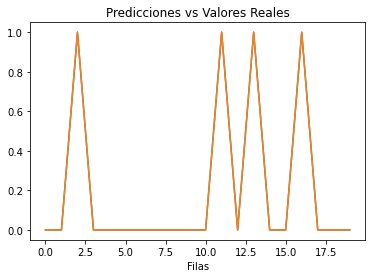

In [88]:
showAccuracyChart(extraTreesClassifier, X, y)

Predicciones:
 [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0]
Valores Reales:
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0.]


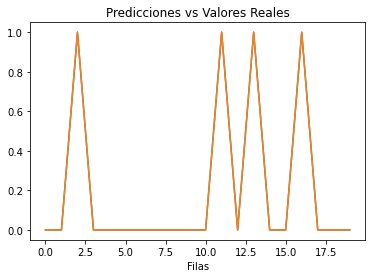

In [89]:
showAccuracyChart(balanced, X, y)

**Justificación**

Como se puede observar en el gráfico, el modelo con mejor rendimiento fue el de Random Forest, no obstante, esta no puede ser la conlusión inmediata pues hay que tomar en cuenta el factor de que los datos no se encuentran balanceados. Dada esta razón, es importante destacar el rendimiento del modelo Balanceado, pues utilizando técnicas de oversampling, logra tener una mejor distribución entre las clases sobre las que cae la categorización

### **8. Variables de Importancia**

In [90]:

def getFeatureImportances(model):
	featureImportanceList = list(model.feature_importances_)

	# List of tuples with variable and importance
	feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, featureImportanceList)]
	# Sort the feature importances by most important first
	feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

	return feature_importances

featureImportanceListRF = getFeatureImportances(randomForestModel)
featureImportanceListET = getFeatureImportances(extraTreesClassifier)
featureImportanceListB = getFeatureImportances(balanced)

print("Random Forest:", featureImportanceListRF[0:3])
print("Extra Trees Classifier:", featureImportanceListET[0:3])
print("Balanced:", featureImportanceListB[0:3])




Random Forest: [('Time Diff between first and last (Mins)', 0.14), ('total ether received', 0.13), ('avg val received', 0.12)]
Extra Trees Classifier: [('Time Diff between first and last (Mins)', 0.18), ('min value received', 0.11), ('Avg min between received tnx', 0.08)]
Balanced: [('Time Diff between first and last (Mins)', 0.12), ('Avg min between received tnx', 0.08), ('avg val received', 0.08)]


**Justificación de las variables**

Como se puede apreciar en los datos obtenidos de los modelos, es los atributos con mayor peso fueron:

- **Time Diff between first and last (Mins): 0.13-1.19**
- **Avg val received: 0.12**
- **Total ether received: 0.11**
- **Avg min between received tnx: 0.08**

Con esto se puede concluir que los modelos son sensibles a los cambios de estos atributos. Se podría decir que es muy probable que la cantidad de eth genere flags a la hora de ser revisadas. Probablemente esas transacciones fraudulentas se hicieron de cantidades iguales o similares siguiendo algún patrón con el cual fueron programadas

---

# **Tarea 03: Redes Neuronales**

### **CARGAR EL DATASET**

In [91]:
import pandas as pd
from numpy import mean
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from keras.wrappers.scikit_learn import KerasClassifier
import matplotlib.pyplot as plt

In [92]:
#Prueba dataframe
dataframe = pd.read_csv("cleaned_transaction_dataset.csv")
dataset = dataframe.values


# split into input (X) and output (y) variables
X, y = dataset[:, 1:], dataset[:, 0]
X, y = X.astype('float'), y.astype('float')


n_features = X.shape[1]
# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.53, random_state=1)

## **Ejemplo con MLP**

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.5)
sc_X = StandardScaler()
X_trainscaled=sc_X.fit_transform(X_train)
X_testscaled=sc_X.transform(X_test)

clf = MLPClassifier(hidden_layer_sizes=(256,128,64,32),activation="relu",random_state=1).fit(X_trainscaled, y_train)
y_pred=clf.predict(X_testscaled)
print(clf.score(X_testscaled, y_test))

0.8366185734606787


/Users/carlosespinoza/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


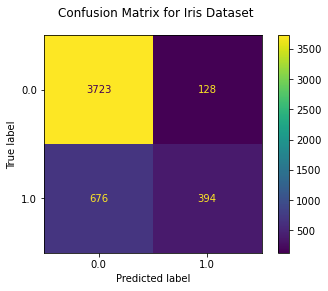

In [94]:
fig=plot_confusion_matrix(clf, X_testscaled, y_test)
fig.figure_.suptitle("Confusion Matrix for Iris Dataset")
plt.show()

## **Propuestas de redes neuronales**

### **Red Neuronal 1:**

In [95]:
def KerasSigmoidModel():
	# define the keras model
	modelSigmoid = Sequential()
	modelSigmoid.add(Dense(20, input_dim=n_features, activation='sigmoid', kernel_initializer='he_normal'))
	modelSigmoid.add(Dense(20, input_dim=n_features, activation='sigmoid', kernel_initializer='he_normal'))
	modelSigmoid.add(Dense(100, input_dim=n_features, activation='sigmoid', kernel_initializer='he_normal'))
	modelSigmoid.add(Dense(1, activation='sigmoid'))
	# compile the keras model
	modelSigmoid.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

	return modelSigmoid

In [109]:
modelSigmoid = KerasSigmoidModel()

# fit the keras model on the dataset
modelSigmoid.fit(X_train, y_train, epochs=50, batch_size=32, verbose=2)
# evaluate on test set
predictions = (modelSigmoid.predict(X_test) > 0.5).astype(int)
# summarize the first 5 cases
for i in range(5):
	print('Result => %d (expected %d)' % (predictions[i], y[i]))

_, accuracy = modelSigmoid.evaluate(X, y, verbose = 0)
print('Accuracy: %.2f' % (accuracy*100))

Epoch 1/50
154/154 - 1s - loss: 0.5518 - accuracy: 0.7388 - 517ms/epoch - 3ms/step
Epoch 2/50
154/154 - 0s - loss: 0.5054 - accuracy: 0.7746 - 142ms/epoch - 925us/step
Epoch 3/50
154/154 - 0s - loss: 0.4650 - accuracy: 0.7880 - 143ms/epoch - 931us/step
Epoch 4/50
154/154 - 0s - loss: 0.4377 - accuracy: 0.8057 - 139ms/epoch - 905us/step
Epoch 5/50
154/154 - 0s - loss: 0.4189 - accuracy: 0.8254 - 144ms/epoch - 937us/step
Epoch 6/50
154/154 - 0s - loss: 0.4031 - accuracy: 0.8311 - 144ms/epoch - 934us/step
Epoch 7/50
154/154 - 0s - loss: 0.3953 - accuracy: 0.8287 - 140ms/epoch - 912us/step
Epoch 8/50
154/154 - 0s - loss: 0.3913 - accuracy: 0.8325 - 143ms/epoch - 929us/step
Epoch 9/50
154/154 - 0s - loss: 0.3887 - accuracy: 0.8331 - 171ms/epoch - 1ms/step
Epoch 10/50
154/154 - 0s - loss: 0.3874 - accuracy: 0.8343 - 147ms/epoch - 954us/step
Epoch 11/50
154/154 - 0s - loss: 0.3880 - accuracy: 0.8346 - 162ms/epoch - 1ms/step
Epoch 12/50
154/154 - 0s - loss: 0.3899 - accuracy: 0.8331 - 134ms/ep

### **Red Neuronal 2:**

In [97]:
def KerasReLUModel():
	modelReLU = Sequential()
	modelReLU.add(Dense(20, input_dim=n_features, activation='relu', kernel_initializer='he_normal'))
	modelReLU.add(Dense(20, input_dim=n_features, activation='relu', kernel_initializer='he_normal'))
	modelReLU.add(Dense(100, input_dim=n_features, activation='relu', kernel_initializer='he_normal'))
	modelReLU.add(Dense(1, activation='relu'))
	# compile the keras model
	modelReLU.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
	
	return modelReLU

In [110]:
modelReLU = KerasReLUModel()

# fit the keras model on the dataset
modelReLU.fit(X_train, y_train, epochs=50, batch_size=32, verbose=2)
# evaluate on test set
predictions = (modelReLU.predict(X_test) > 0.5).astype(int)
# summarize the first 5 cases
for i in range(5):
	print('Result => %d (expected %d)' % (predictions[i], y[i]))

_, accuracy = modelReLU.evaluate(X, y, verbose = 0)
print('Accuracy: %.2f' % (accuracy*100))

Epoch 1/50
154/154 - 1s - loss: 2.8963 - accuracy: 0.7911 - 544ms/epoch - 4ms/step
Epoch 2/50
154/154 - 0s - loss: 2.7797 - accuracy: 0.8163 - 140ms/epoch - 909us/step
Epoch 3/50
154/154 - 0s - loss: 2.8032 - accuracy: 0.8157 - 139ms/epoch - 904us/step
Epoch 4/50
154/154 - 0s - loss: 2.8029 - accuracy: 0.8163 - 138ms/epoch - 897us/step
Epoch 5/50
154/154 - 0s - loss: 2.8030 - accuracy: 0.8167 - 136ms/epoch - 886us/step
Epoch 6/50
154/154 - 0s - loss: 2.7993 - accuracy: 0.8165 - 140ms/epoch - 907us/step
Epoch 7/50
154/154 - 0s - loss: 2.8154 - accuracy: 0.8161 - 144ms/epoch - 935us/step
Epoch 8/50
154/154 - 0s - loss: 2.8055 - accuracy: 0.8163 - 158ms/epoch - 1ms/step
Epoch 9/50
154/154 - 0s - loss: 2.8082 - accuracy: 0.8157 - 130ms/epoch - 842us/step
Epoch 10/50
154/154 - 0s - loss: 2.8176 - accuracy: 0.8154 - 167ms/epoch - 1ms/step
Epoch 11/50
154/154 - 0s - loss: 2.8113 - accuracy: 0.8159 - 193ms/epoch - 1ms/step
Epoch 12/50
154/154 - 0s - loss: 2.8145 - accuracy: 0.8159 - 191ms/epoc

### **Red Neuronal 3:**

In [99]:
def KerasLinearModel():
	modelLinear = Sequential()
	modelLinear.add(Dense(20, input_dim=n_features, activation='linear', kernel_initializer='he_normal'))
	modelLinear.add(Dense(20, input_dim=n_features, activation='linear', kernel_initializer='he_normal'))
	modelLinear.add(Dense(100, input_dim=n_features, activation='linear', kernel_initializer='he_normal'))
	modelLinear.add(Dense(1, activation='linear'))
	# compile the keras model
	modelLinear.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

	return modelLinear

In [111]:

modelLinear = KerasLinearModel()
# fit the keras model on the dataset
modelLinear.fit(X_train, y_train, epochs=50, batch_size=32, verbose=2)
# evaluate on test set
predictions = (modelLinear.predict(X_test) > 0.5).astype(int)
# summarize the first 5 cases
for i in range(5):
	print('Result => %d (expected %d)' % (predictions[i], y[i]))

_, accuracy = modelLinear.evaluate(X, y, verbose = 0)
print('Accuracy: %.2f' % (accuracy*100))

Epoch 1/50
154/154 - 1s - loss: 3.9515 - accuracy: 0.7378 - 536ms/epoch - 3ms/step
Epoch 2/50
154/154 - 0s - loss: 2.9821 - accuracy: 0.8063 - 158ms/epoch - 1ms/step
Epoch 3/50
154/154 - 0s - loss: 3.0005 - accuracy: 0.8051 - 190ms/epoch - 1ms/step
Epoch 4/50
154/154 - 0s - loss: 3.0005 - accuracy: 0.8051 - 236ms/epoch - 2ms/step
Epoch 5/50
154/154 - 0s - loss: 3.0005 - accuracy: 0.8051 - 167ms/epoch - 1ms/step
Epoch 6/50
154/154 - 0s - loss: 3.0005 - accuracy: 0.8051 - 140ms/epoch - 912us/step
Epoch 7/50
154/154 - 0s - loss: 3.0005 - accuracy: 0.8051 - 180ms/epoch - 1ms/step
Epoch 8/50
154/154 - 0s - loss: 3.0005 - accuracy: 0.8051 - 168ms/epoch - 1ms/step
Epoch 9/50
154/154 - 0s - loss: 3.0005 - accuracy: 0.8051 - 146ms/epoch - 946us/step
Epoch 10/50
154/154 - 0s - loss: 3.0005 - accuracy: 0.8051 - 139ms/epoch - 903us/step
Epoch 11/50
154/154 - 0s - loss: 3.0005 - accuracy: 0.8051 - 147ms/epoch - 957us/step
Epoch 12/50
154/154 - 0s - loss: 3.0005 - accuracy: 0.8051 - 172ms/epoch - 1m

---

## **Validación Cruzada**

### **Red Neuronal 1:**

In [101]:
neuralNetwork = KerasClassifier(build_fn=KerasSigmoidModel, 
                                 epochs=50, 
                                 batch_size=100, 
                                 verbose=0)

kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=6)
sigmoidResults = cross_val_score(neuralNetwork, X, y, cv=kfold)

/var/folders/fm/_9tz9qqn5jq29znl8p88gfn00000gn/T/ipykernel_2037/4057752158.py:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  neuralNetwork = KerasClassifier(build_fn=KerasSigmoidModel,


### **Red Neuronal 2:**

In [102]:
neuralNetwork = KerasClassifier(build_fn=KerasReLUModel, 
                                 epochs=50, 
                                 batch_size=100, 
                                 verbose=0)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=6)
reLUResults = cross_val_score(neuralNetwork, X, y, cv=kfold)

/var/folders/fm/_9tz9qqn5jq29znl8p88gfn00000gn/T/ipykernel_2037/1982992831.py:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  neuralNetwork = KerasClassifier(build_fn=KerasReLUModel,


### **Red Neuronal 3:**

In [103]:
neuralNetwork = KerasClassifier(build_fn=KerasLinearModel, 
                                 epochs=50, 
                                 batch_size=100, 
                                 verbose=0)

kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=6)
linearResults = cross_val_score(neuralNetwork, X, y, cv=kfold)

/var/folders/fm/_9tz9qqn5jq29znl8p88gfn00000gn/T/ipykernel_2037/2504515991.py:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  neuralNetwork = KerasClassifier(build_fn=KerasLinearModel,


In [104]:
print(sigmoidResults)
print("Sigmoid mean %.2f" % mean(sigmoidResults))

print(reLUResults)
print("ReLU mean %.2f" % mean(reLUResults))

print(linearResults)
print("Linar mean %.2f" % mean(linearResults))

[0.83654821 0.84552848 0.82926828 0.83028454 0.83536583 0.84552848
 0.8313008  0.8313008  0.83841461 0.83231705]
Sigmoid mean 0.84
[0.77868021 0.80589432 0.78963417 0.77845526 0.74288619 0.77845526
 0.79979676 0.22357723 0.77845526 0.80284554]
ReLU mean 0.73
[0.80710661 0.77947152 0.78252035 0.22154471 0.76016259 0.81097561
 0.777439   0.22154471 0.81097561 0.80182928]
Linar mean 0.68


### **Mejor rendimiento de red**

Según lo visto en los resultados de la acertividad que tuvieron los modelos, se puede determinar que el modelo de RN que utiliza las funciones de activación `sigmoid` tiene el mejor rendimiento. Según la teoría, este resultado tiene sentido, pues se trata de un problema de clasificación binaria. Haciendo diferentes ajustes en los hiperparámetros se detectó que pasadas las 50 épocas, no había un cambio significativo en el grado de acertividad del modelo.

## **Comparación con Random Forest**

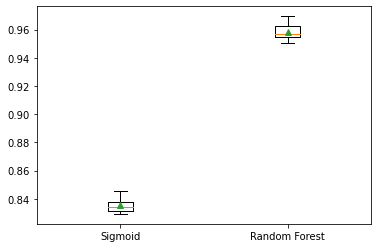

In [106]:
results = list()
results.append(sigmoidResults)
results.append(cross_val_score(randomForestModel, X, y, cv = kfold))

pyplot.boxplot(results, labels=["Sigmoid", "Random Forest"], showmeans=True)
pyplot.show()

Como se puede observar en la gráfica, el modelo de bosque aleatorio tiene una increíble superioridad sobre el modelo de redes neuronales, sin embargo, esto no es del todo cierto. Como se había mencionado en la tarea pasada, este dataset tiene el problema de estar sumamente desbalancedo, por lo que un resultado como el del random forest resulta un poco difícil de creer. En cambio, el modelo de RN arrojó un resultado más confiable y al final este sería el modelo que recomentaría, no solo por como trata el desbalance, sino porque al tratarse de un problema real que día con día cambia sus parámetros, se necesita de un modelo que sea paz de ajustarse en su entrenamiento a los diferentes casos de prueba. El random forest utilizada decisiones basadas en los valores estudiados, la red neuronal hace ajustes en sus pesos, con dicho ajuste se puede ayudar a predecir los casos que todavía no ha visto.